In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data
X_train = pd.read_csv("X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("y_train.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv("X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("y_test.txt", delim_whitespace=True, header=None)

In [2]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [4]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [5]:
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


In [6]:
X_train.isnull().values.any()

False

In [7]:
X_test.isnull().values.any()

False

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1500, random_state=42)
softmax_reg.fit(X_train, y_train.values.ravel())
y_pred = softmax_reg.predict(X_test)

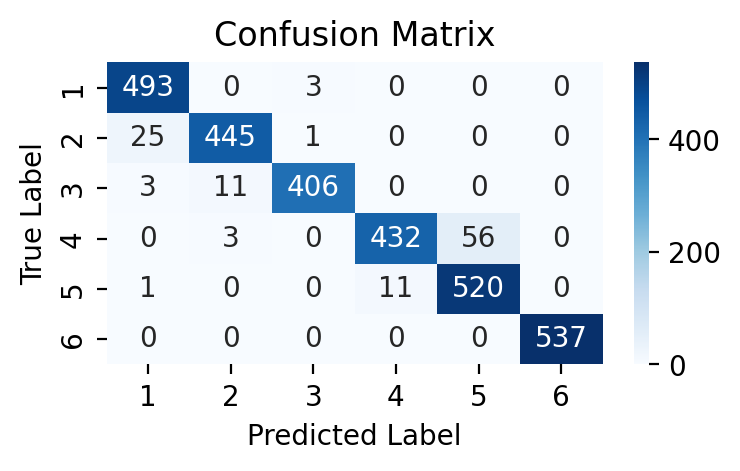

Balanced Accuracy: 96.0%


In [9]:
# Calculating the confusion matrix and balanced accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(4, 2), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix LR pre processed data", bbox_inches='tight')
plt.show()

print("Balanced Accuracy: {:.1%}".format(balanced_acc))

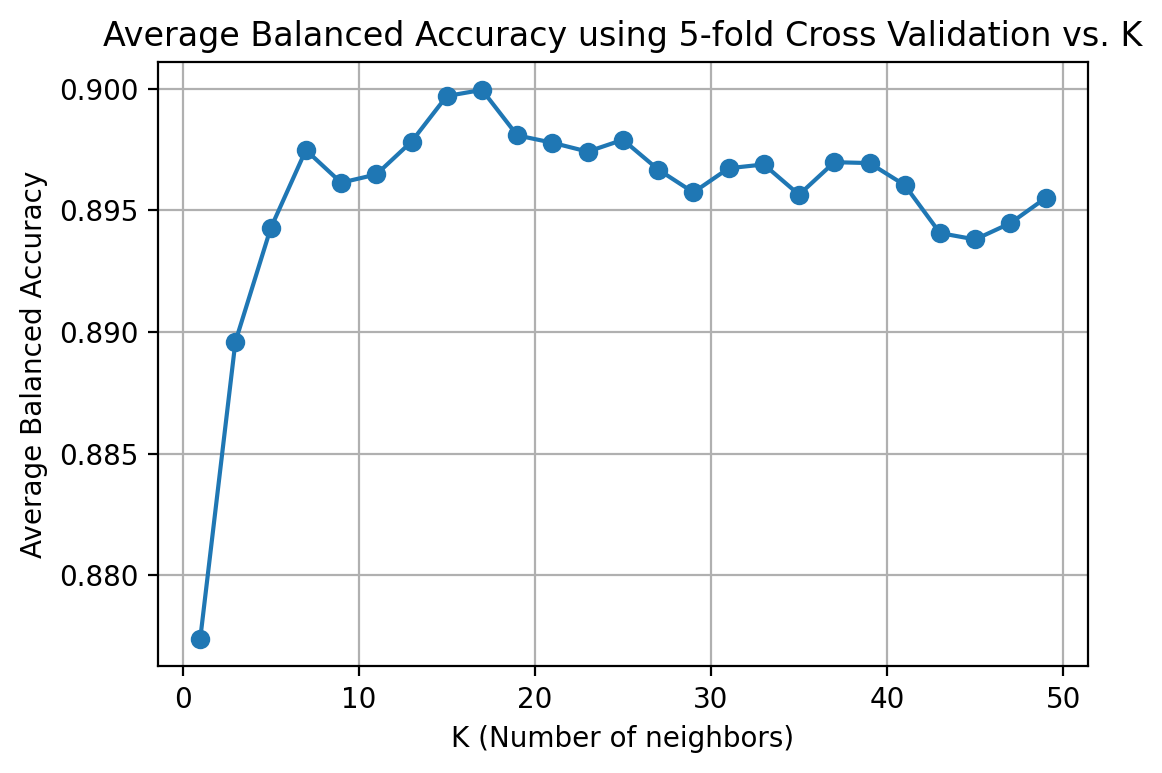

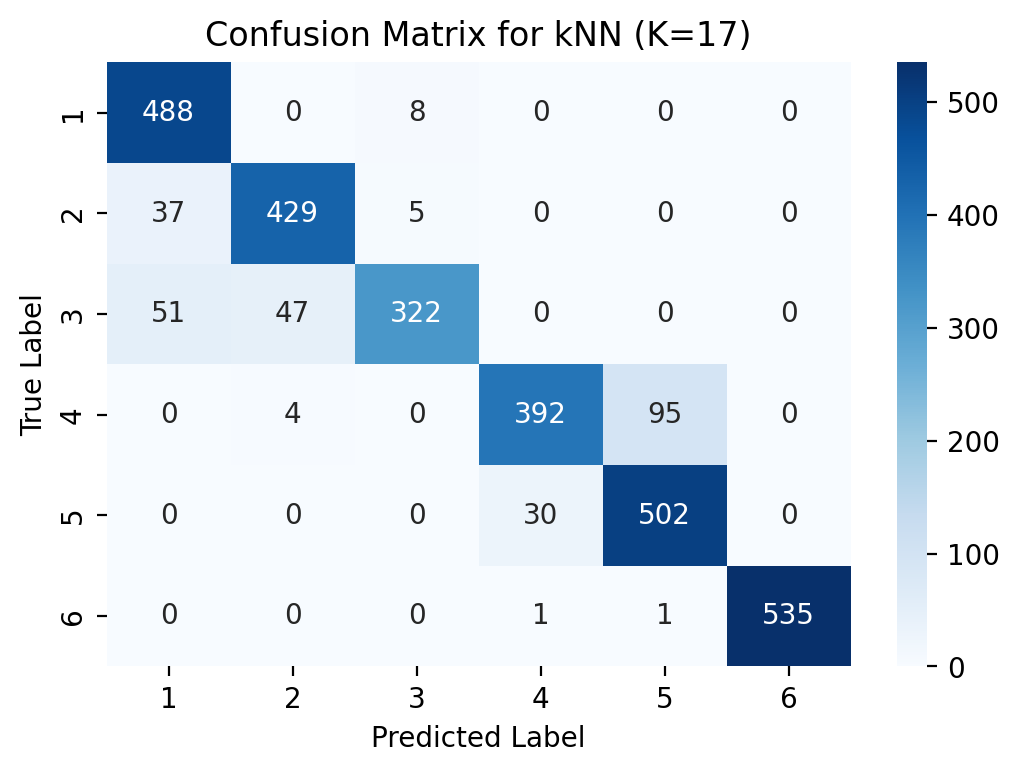

Balanced Accuracy on the Test Set for kNN (K=17): 90.0%


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Defining the values of K
k_values = np.arange(1, 51, 2) 

balanced_accuracies = []

# Looping over the values of K
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross validation using balanced accuracy as a scoring metric
    cross_val_accuracies = cross_val_score(knn, X_train, y_train.values.ravel(), cv=5, scoring='balanced_accuracy')
    mean_balanced_accuracy = np.mean(cross_val_accuracies)
    balanced_accuracies.append(mean_balanced_accuracy)

# Finding the best value of K
best_k_index = np.argmax(balanced_accuracies)
best_k = k_values[best_k_index]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train.values.ravel())

test_predictions = best_knn.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Plotting the balanced accuracy as a function of K
plt.figure(figsize=(6,4), dpi=200)
plt.plot(k_values, balanced_accuracies, marker='o')
plt.xlabel('K (Number of neighbors)')
plt.ylabel('Average Balanced Accuracy')
plt.title('Average Balanced Accuracy using 5-fold Cross Validation vs. K')
plt.grid(True)
plt.savefig("Balanced Accuracy kNN vs k", bbox_inches='tight')
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for kNN (K={best_k})")
plt.savefig("Confusion Matrix kNN pre processed data", bbox_inches='tight')
plt.show()

print("Balanced Accuracy on the Test Set for kNN (K={}): {:.1%}".format(best_k,test_balanced_accuracy))

In [11]:
# Let's use the raw data from both the accelerometer (body and total acceleration) and gyroscope

df_accbody_x = pd.read_csv("body_acc_x_train.txt",delim_whitespace=True,header=None)
df_accbody_y = pd.read_csv("body_acc_y_train.txt",delim_whitespace=True,header=None)
df_accbody_z = pd.read_csv("body_acc_z_train.txt",delim_whitespace=True,header=None)
df_totalacc_x = pd.read_csv("total_acc_x_train.txt",delim_whitespace=True,header=None)
df_totalacc_y = pd.read_csv("total_acc_y_train.txt",delim_whitespace=True,header=None)
df_totalacc_z = pd.read_csv("total_acc_z_train.txt",delim_whitespace=True,header=None)
df_gyro_x = pd.read_csv("body_gyro_x_train.txt",delim_whitespace=True,header=None)
df_gyro_y = pd.read_csv("body_gyro_y_train.txt",delim_whitespace=True,header=None)
df_gyro_z = pd.read_csv("body_gyro_z_train.txt",delim_whitespace=True,header=None)

df_accbody_x_test = pd.read_csv("body_acc_x_test.txt",delim_whitespace=True,header=None)
df_accbody_y_test = pd.read_csv("body_acc_y_test.txt",delim_whitespace=True,header=None)
df_accbody_z_test = pd.read_csv("body_acc_z_test.txt",delim_whitespace=True,header=None)
df_totalacc_x_test = pd.read_csv("total_acc_x_test.txt",delim_whitespace=True,header=None)
df_totalacc_y_test = pd.read_csv("total_acc_y_test.txt",delim_whitespace=True,header=None)
df_totalacc_z_test = pd.read_csv("total_acc_z_test.txt",delim_whitespace=True,header=None)
df_gyro_x_test = pd.read_csv("body_gyro_x_test.txt",delim_whitespace=True,header=None)
df_gyro_y_test = pd.read_csv("body_gyro_y_test.txt",delim_whitespace=True,header=None)
df_gyro_z_test = pd.read_csv("body_gyro_z_test.txt",delim_whitespace=True,header=None)

X_train_bodyacc = pd.concat([df_accbody_x,df_accbody_y,df_accbody_z,df_gyro_x,df_gyro_y,df_gyro_z],axis=1)
X_train_totalacc = pd.concat([df_totalacc_x,df_totalacc_y,df_totalacc_z,df_gyro_x,df_gyro_y,df_gyro_z],axis=1)

X_test_bodyacc = pd.concat([df_accbody_x_test,df_accbody_y_test,df_accbody_z_test,df_gyro_x_test,df_gyro_y_test,df_gyro_z_test],axis=1)
X_test_totalacc = pd.concat([df_totalacc_x_test,df_totalacc_y_test,df_totalacc_z_test,df_gyro_x_test,df_gyro_y_test,df_gyro_z_test],axis=1)

In [12]:
# Let's standardize the data in order to make the training easier when applying Logistic Regression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bodyacc_scaled = scaler.fit_transform(X_train_bodyacc)
X_test_bodyacc_scaled = scaler.transform(X_test_bodyacc)
X_train_totalacc_scaled = scaler.fit_transform(X_train_totalacc)
X_test_totalacc_scaled = scaler.transform(X_test_totalacc)

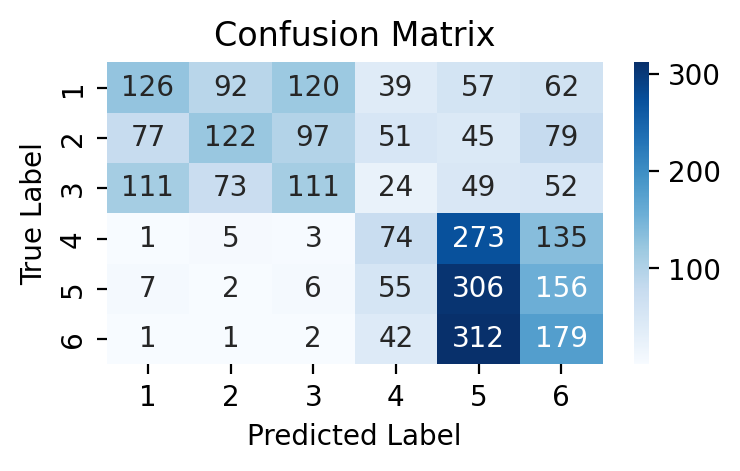

Balanced Accuracy: 30.6%


In [13]:
# Let's train the Logistic Regression model using the inertial signals from body acceleration and gyroscope
softmax_reg.fit(X_train_bodyacc_scaled, y_train.values.ravel())
y_pred = softmax_reg.predict(X_test_bodyacc_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(4, 2), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix rawdata_bodyacc",bbox_inches='tight')
plt.show()

print("Balanced Accuracy: {:.1%}".format(balanced_acc))

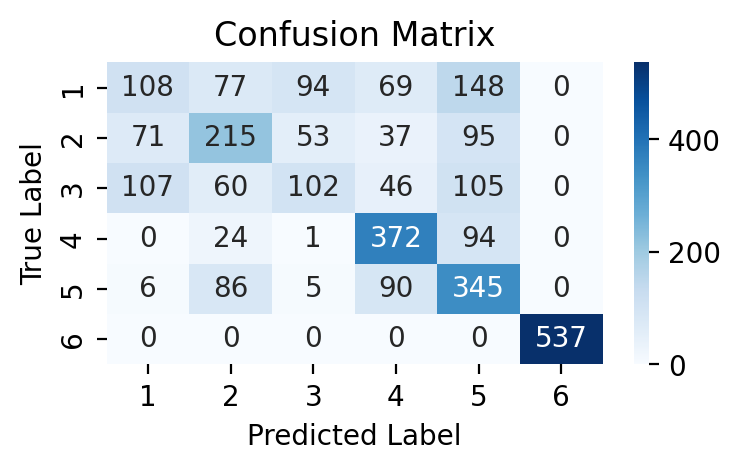

Balanced Accuracy: 55.4%


In [14]:
# Let's train the Logistic Regression model using the inertial signals from total acceleration (body + gravity) and gyroscope
softmax_reg.fit(X_train_totalacc_scaled, y_train.values.ravel())
y_pred = softmax_reg.predict(X_test_totalacc_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(4, 2), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix rawdata_totalacc",bbox_inches='tight')
plt.show()

print("Balanced Accuracy: {:.1%}".format(balanced_acc))

In [15]:
# Applying MinMax scale to the data for the kNN

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_bodyacc_scaled = scaler.fit_transform(X_train_bodyacc)
X_test_bodyacc_scaled = scaler.transform(X_test_bodyacc)
X_train_totalacc_scaled = scaler.fit_transform(X_train_totalacc)
X_test_totalacc_scaled = scaler.transform(X_test_totalacc)

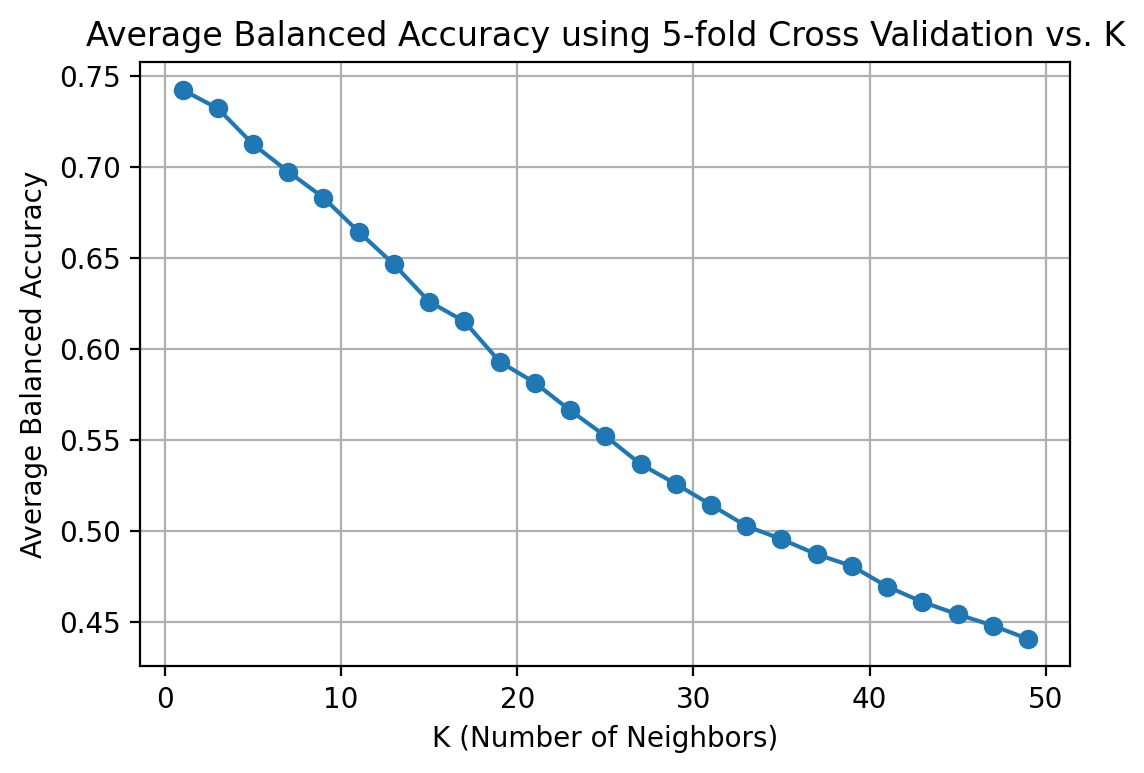

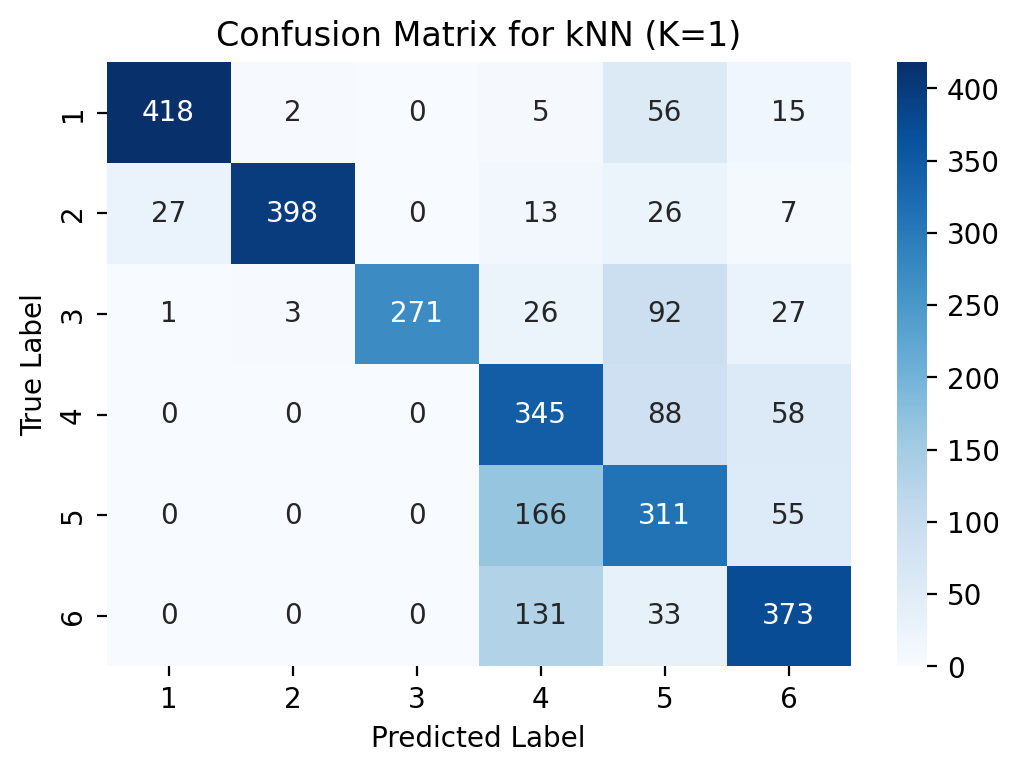

Balanced Accuracy on the Test Set for kNN (K=1): 71.9%


In [16]:
# Now let's train the kNN model using the inertial signals from body acceleration and gyroscope

# Defining the values of K
k_values = np.arange(1, 51, 2) 

balanced_accuracies = []

# Looping over the values of K
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross validation using balanced accuracy as a scoring metric
    cross_val_accuracies = cross_val_score(knn, X_train_bodyacc_scaled, y_train.values.ravel(), cv=5, scoring='balanced_accuracy')
    mean_balanced_accuracy = np.mean(cross_val_accuracies)
    balanced_accuracies.append(mean_balanced_accuracy)

# Finding the best value of K
best_k_index = np.argmax(balanced_accuracies)
best_k = k_values[best_k_index]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_bodyacc_scaled, y_train.values.ravel())

test_predictions = best_knn.predict(X_test_bodyacc_scaled)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Plotting the balanced accuracy as a function of K
plt.figure(figsize=(6,4), dpi=200)
plt.plot(k_values, balanced_accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Balanced Accuracy')
plt.title('Average Balanced Accuracy using 5-fold Cross Validation vs. K')
plt.grid(True)
plt.savefig("Balanced Accuracy kNN rawdata_bodyacc",bbox_inches='tight')
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for kNN (K={best_k})")
plt.savefig("Confusion Matrix kNN rawdata_bodyacc",bbox_inches='tight')
plt.show()

print("Balanced Accuracy on the Test Set for kNN (K={}): {:.1%}".format(best_k,test_balanced_accuracy))

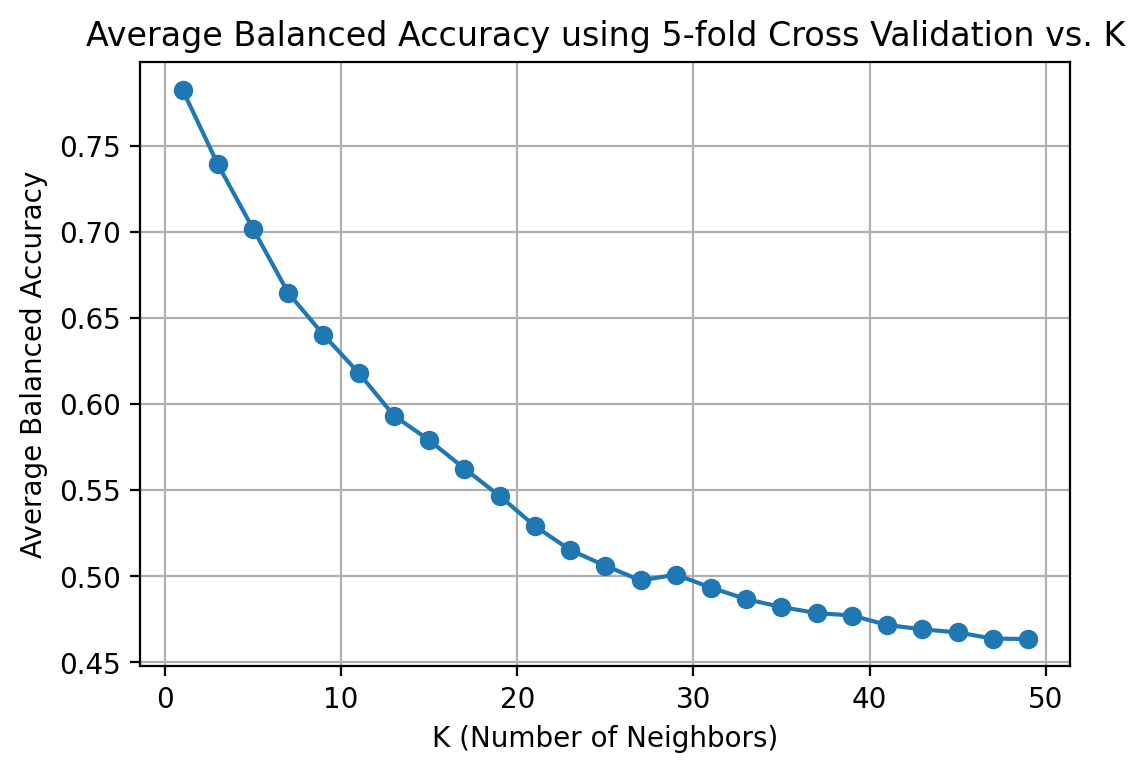

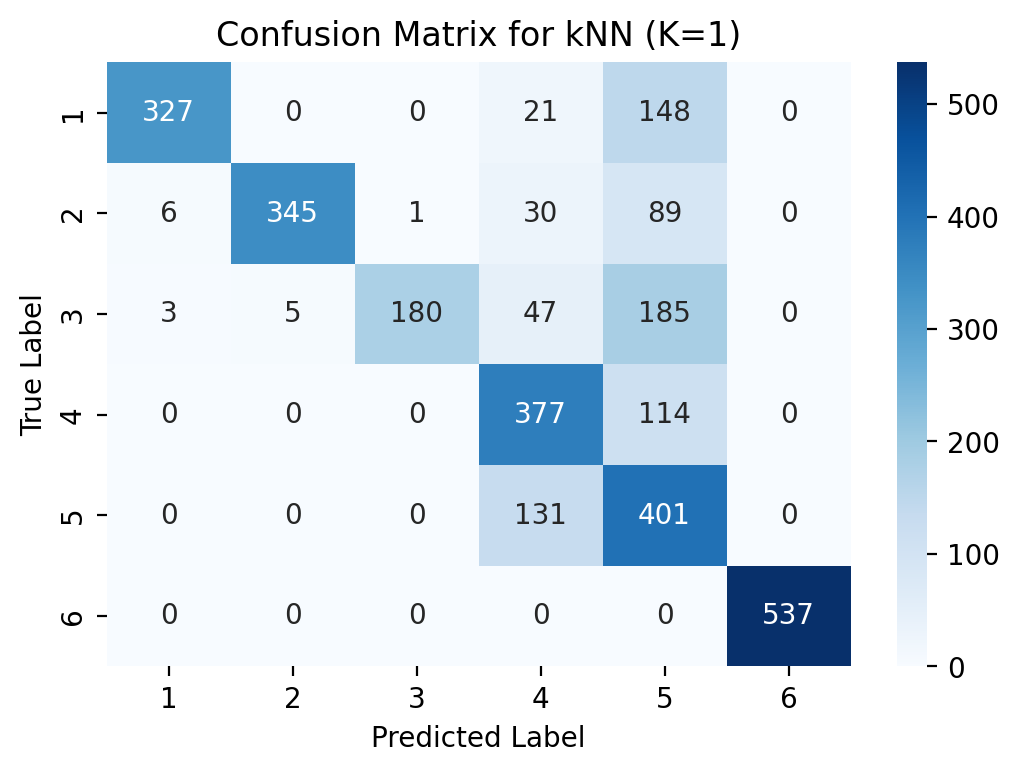

Balanced Accuracy on the Test Set for kNN (K=1): 72.4%


In [17]:
# Now let's train the kNN model using the inertial signals from total acceleration (body + gravity) and gyroscope

# Defining the values of K
k_values = np.arange(1, 51, 2) 

balanced_accuracies = []

# Looping over the values of K
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross validation using balanced accuracy as a scoring metric
    cross_val_accuracies = cross_val_score(knn, X_train_totalacc_scaled, y_train.values.ravel(), cv=5, scoring='balanced_accuracy')
    mean_balanced_accuracy = np.mean(cross_val_accuracies)
    balanced_accuracies.append(mean_balanced_accuracy)

# Finding the best value of K
best_k_index = np.argmax(balanced_accuracies)
best_k = k_values[best_k_index]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_totalacc_scaled, y_train.values.ravel())

test_predictions = best_knn.predict(X_test_totalacc_scaled)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Plotting the balanced accuracy as a function of K
plt.figure(figsize=(6,4), dpi=200)
plt.plot(k_values, balanced_accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Balanced Accuracy')
plt.title('Average Balanced Accuracy using 5-fold Cross Validation vs. K')
plt.grid(True)
plt.savefig("Balanced Accuracy kNN rawdata_totalacc",bbox_inches='tight')
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "2", "3", "4", "5", "6"], yticklabels=["1", "2", "3", "4", "5", "6"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for kNN (K={best_k})")
plt.savefig("Confusion Matrix kNN rawdata_totalacc",bbox_inches='tight')
plt.show()

print("Balanced Accuracy on the Test Set for kNN (K={}): {:.1%}".format(best_k,test_balanced_accuracy))